In [2]:
import seaborn as sns

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


분석해보세요
1, 성별별 생존율
2, 객실 등급에 따른 생존율
3. 객실 등급에 따른 남여 생존율
4. 혼자탑승한사람과 가족과 탑승할 사람의 생존율
5. 요금에 따른 생존윺
6. 연령별 생존율

In [4]:
#1) 성별별 생존율
df = titanic.copy()
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df1 = df.groupby('sex', as_index=False)['alive'].value_counts(normalize=True) #성별별로 alive에 대한 value_counts를 구한
df1 = df1[df1['alive']=='yes'] #우리는 생존에 대한 것만 궁금하니까 alive가 yes인 것만 추출하자
# df1 = df1.query('alive=="yes"') 일케해도됨
df1

,sex,alive,proportion
0,female,yes,0.742038
3,male,yes,0.188908


<Axes: xlabel='sex', ylabel='proportion'>

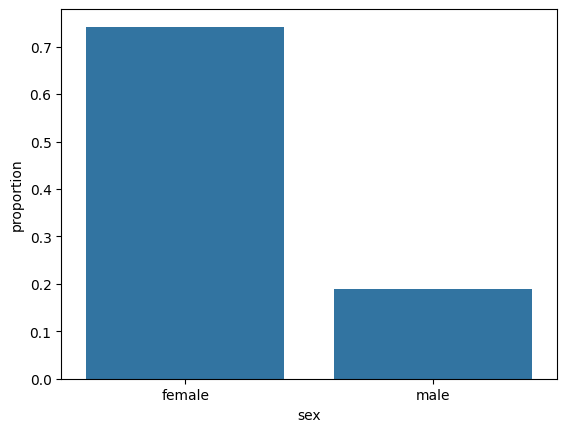

In [6]:
sns.barplot(data= df1, x='sex',y='proportion') #여기가 첨엔 hue썼었느데 그건 alive아닌 것들도 포함이라서 글케햇엇음

In [8]:
# 2. 객실 등급에 따른 생존자
df2 = df.groupby('pclass',as_index=False)['alive'].value_counts(normalize=True)
df2 = df2[df2['alive']=='yes']
df2

,pclass,alive,proportion
0,1,yes,0.629630
3,2,yes,0.472826
5,3,yes,0.242363


<Axes: xlabel='pclass', ylabel='proportion'>

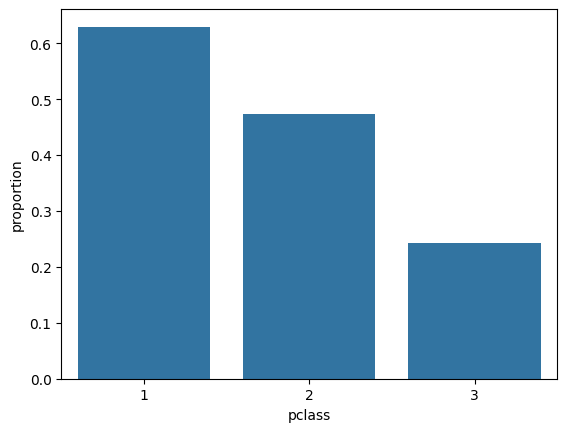

In [9]:
sns.barplot(data= df2, x='pclass', y='proportion')

In [10]:
# 3. 객실 등급에 따른 남여 생존율
df3 = df.groupby(['pclass','sex'],as_index=False)['alive'].value_counts(normalize=True)
df3 = df3[df3['alive']=='yes']
df3

,pclass,sex,alive,proportion
0,1,female,yes,0.968085
3,1,male,yes,0.368852
4,2,female,yes,0.921053
7,2,male,yes,0.157407
9,3,female,yes,0.500000
11,3,male,yes,0.135447


<Axes: xlabel='pclass', ylabel='proportion'>

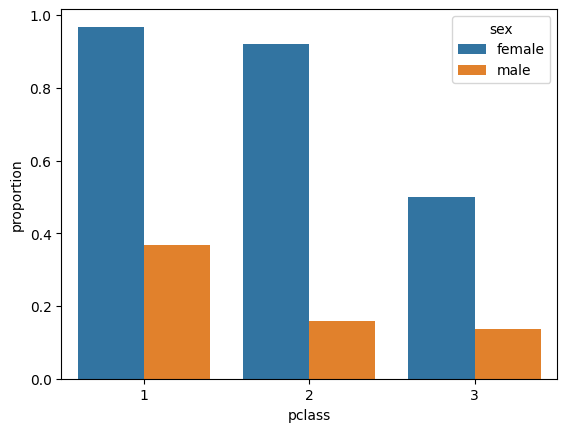

In [11]:
sns.barplot(data = df3, x='pclass',y='proportion',hue='sex')

In [12]:
import numpy as np

In [13]:
#4. 혼자 탄 사람이랑 가족이랑 같이 탄 사람 생존율
df4 = df.groupby('alone', as_index=False)['alive'].value_counts(normalize=True)
df4 = df4[df4['alive']=='yes']
df4

,alone,alive,proportion
0,False,yes,0.505650
3,True,yes,0.303538


<Axes: xlabel='alone', ylabel='proportion'>

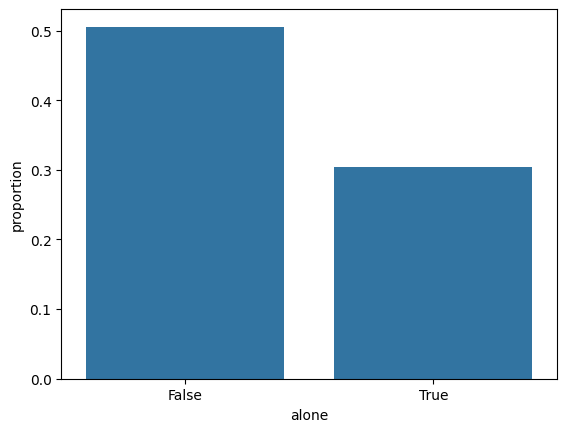

In [14]:
sns.barplot(data = df4, x='alone',y='proportion')

5,6번은 데이터 분석에 의미가 없는것 같음 걍 버리자

In [15]:
# 요금에 따른 생존자 수
df['fare'].value_counts()
df5 = df.groupby(['fare','alive'],as_index = False).agg(n=('age','count'))
df5

,fare,alive,n
0,0.0000,no,6
1,0.0000,yes,1
2,4.0125,no,1
3,5.0000,no,1
4,6.2375,no,1
...,...,...,...
325,247.5208,yes,1
326,262.3750,yes,2
327,263.0000,no,2
328,263.0000,yes,2


<Axes: xlabel='fare', ylabel='n'>

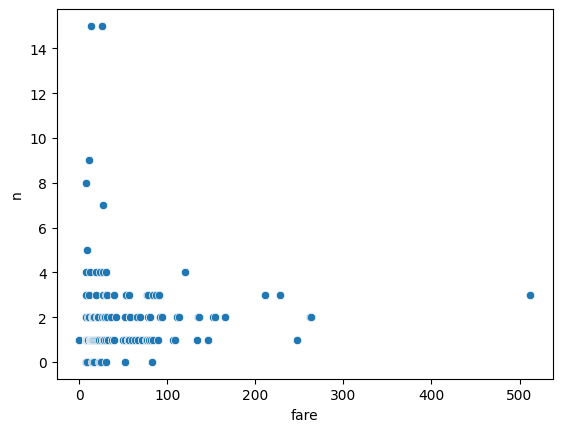

In [16]:
df5 = df5.query('alive=="yes"')
#요금이 비쌀수록 생존자 수가 많을까? 상관관계를 나타내고 싶으면 산점도를 그려서 파악한다
sns.scatterplot(data = df5, x='fare',y='n')

In [17]:
df6 = df.groupby(['age','alive'],as_index = False).agg(n=('age','count'))
df6 = df6.query('alive=="yes"')

In [18]:
df6

,age,alive,n
0,0.42,yes,1
1,0.67,yes,1
2,0.75,yes,2
3,0.83,yes,2
4,0.92,yes,1
...,...,...,...
126,58.00,yes,3
129,60.00,yes,2
132,62.00,yes,2
133,63.00,yes,2


KeyError: 'y'

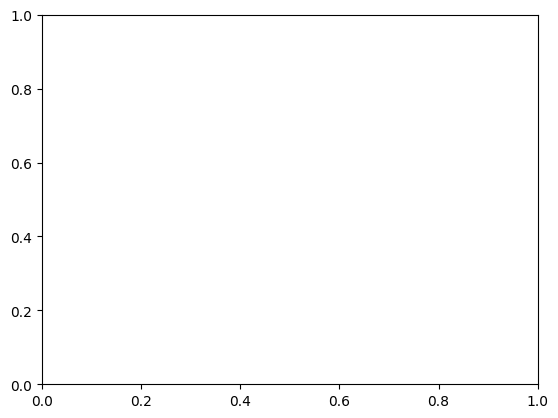

In [19]:
sns.lineplot(data = df6, x = 'age')